Electricity exercise

Data file hourly_prices.csv contains hourly electricity prices (cents per kWh) in 16.6.2021 - 16.6.2022
Another file electricity_consumption.csv gives you electricity consumption data from Finnish household over the same period.

Calculate the following things and show the results in printouts:
- Total consumption over the time period
- Average hourly price over the time period
- Total electricity bill over the time period
Use informative printouts, like "Total bill paid is xyz €", not just plain numbers

Calculate and visualize the following things:
- Hourly price, consumption and bill (subplot of three horizontal panels)
- Histogram distribution of hourly price, hourly consumption and hourly bill (subplot of three panels, side by side)
- Daily average price, daily total consumption and daily total bill (subplot of three horizontal panels)

Pay attention to figure size, axes labels, figure name, grid lines and colors. 

Return executed Jupyter notebook where printouts and visualizations are visible.

TIPS:
- If data import fails, check delimiter and decimal parameters in Pandas read_csv -function
- Join of two data sets: df.join(df.set_index('column'), on='column')
- Time conversions: datetime.datetime.strptime(time_data, format)
- Read value from strig: df['column'].str.split('delimiter').str[index]
- print('Some text ' + str(number) + 'more text')
- Remember grouping when calculating daily values!


Total consumption during this period was 13281.68 kWh
Average price per hour was 12.01 cents/kWh
The complete amount billed was 1669.04 €


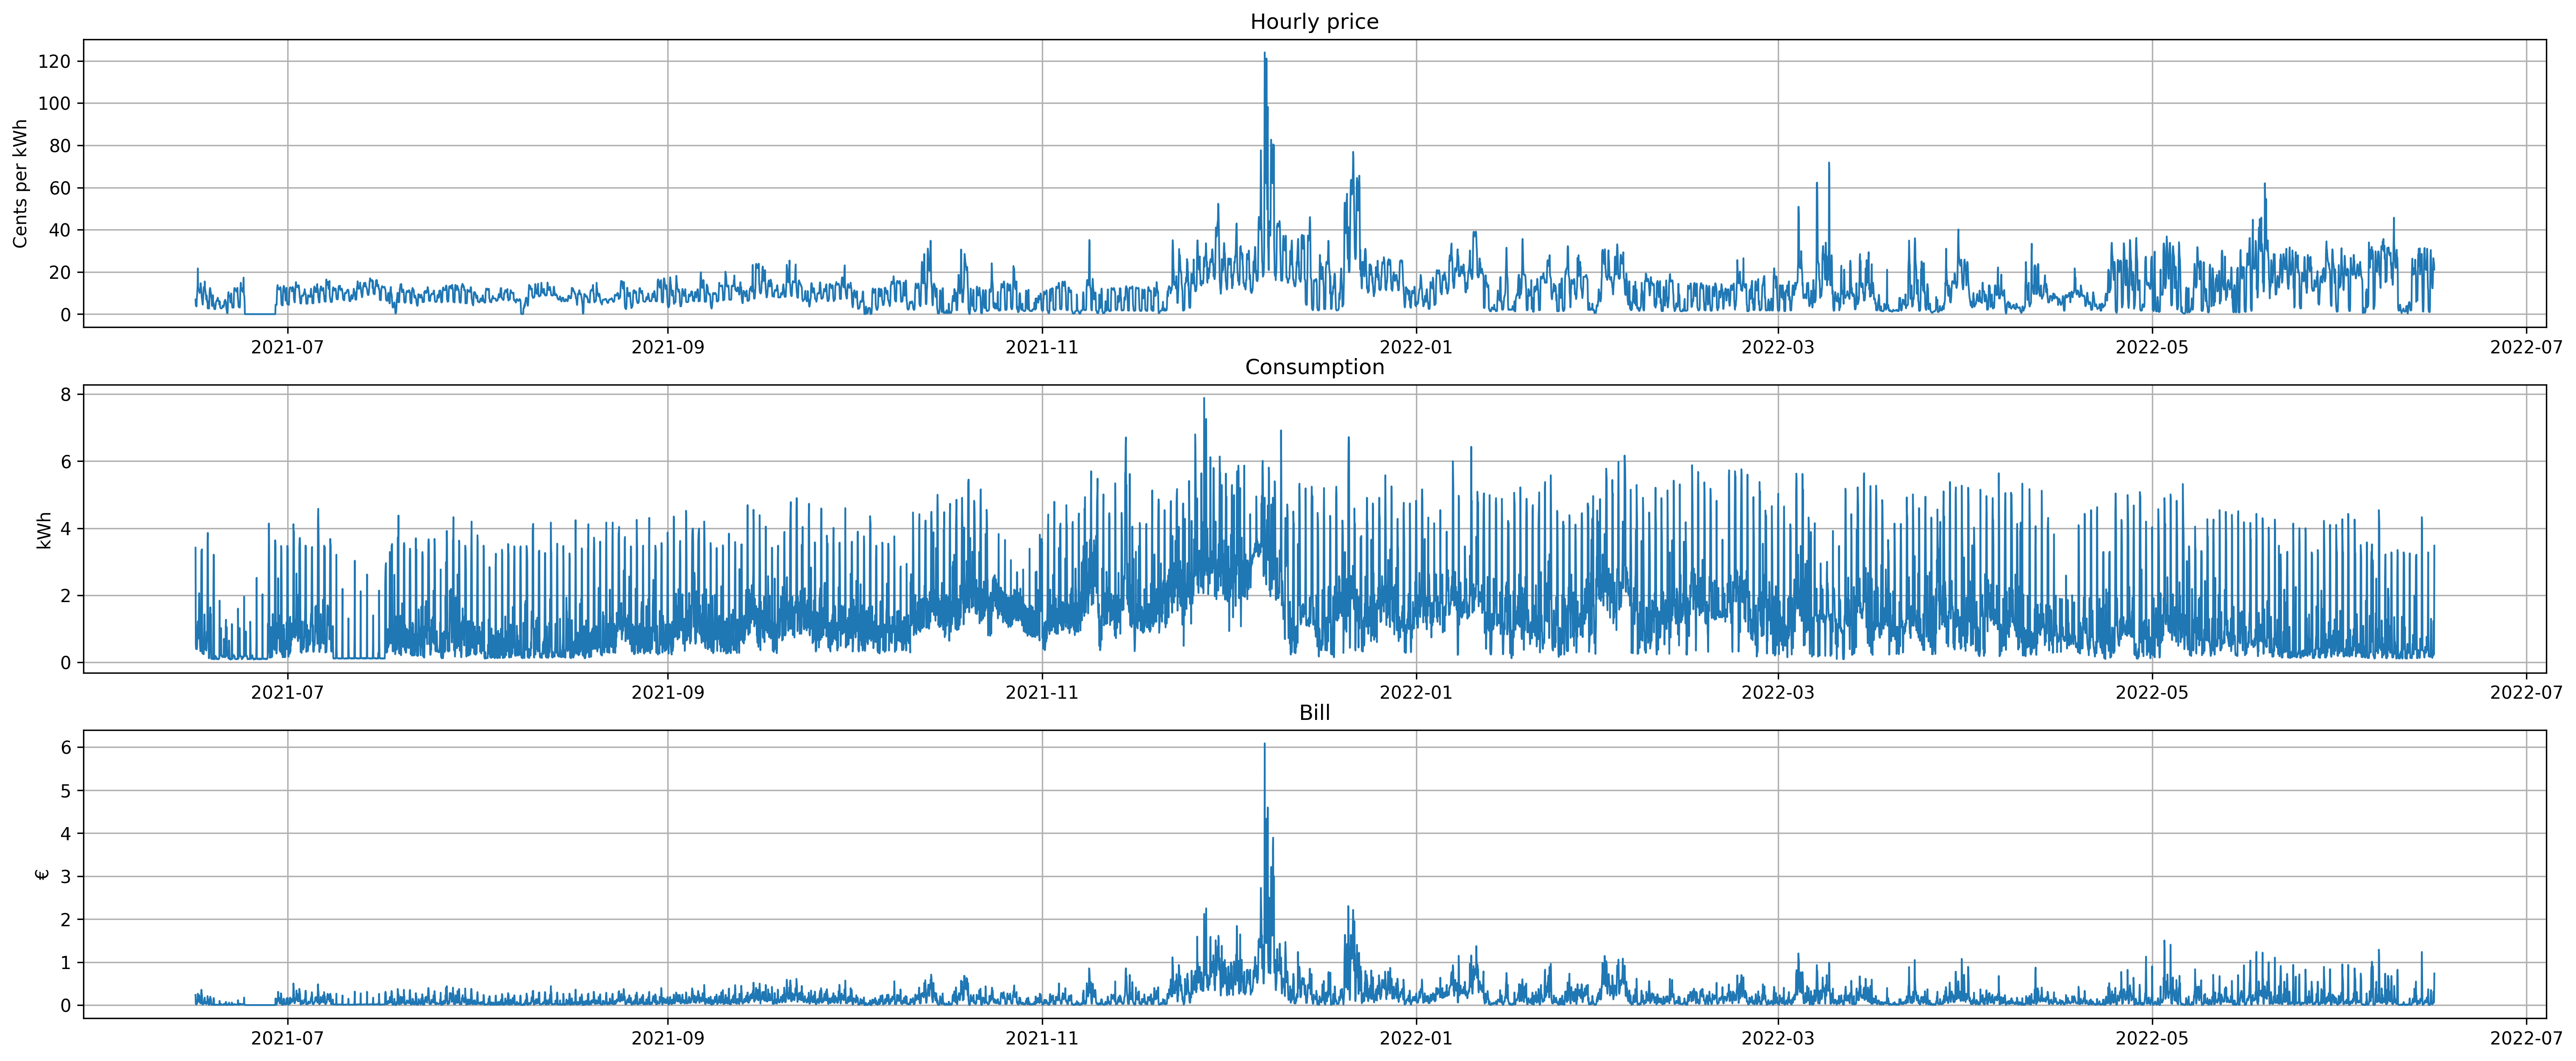

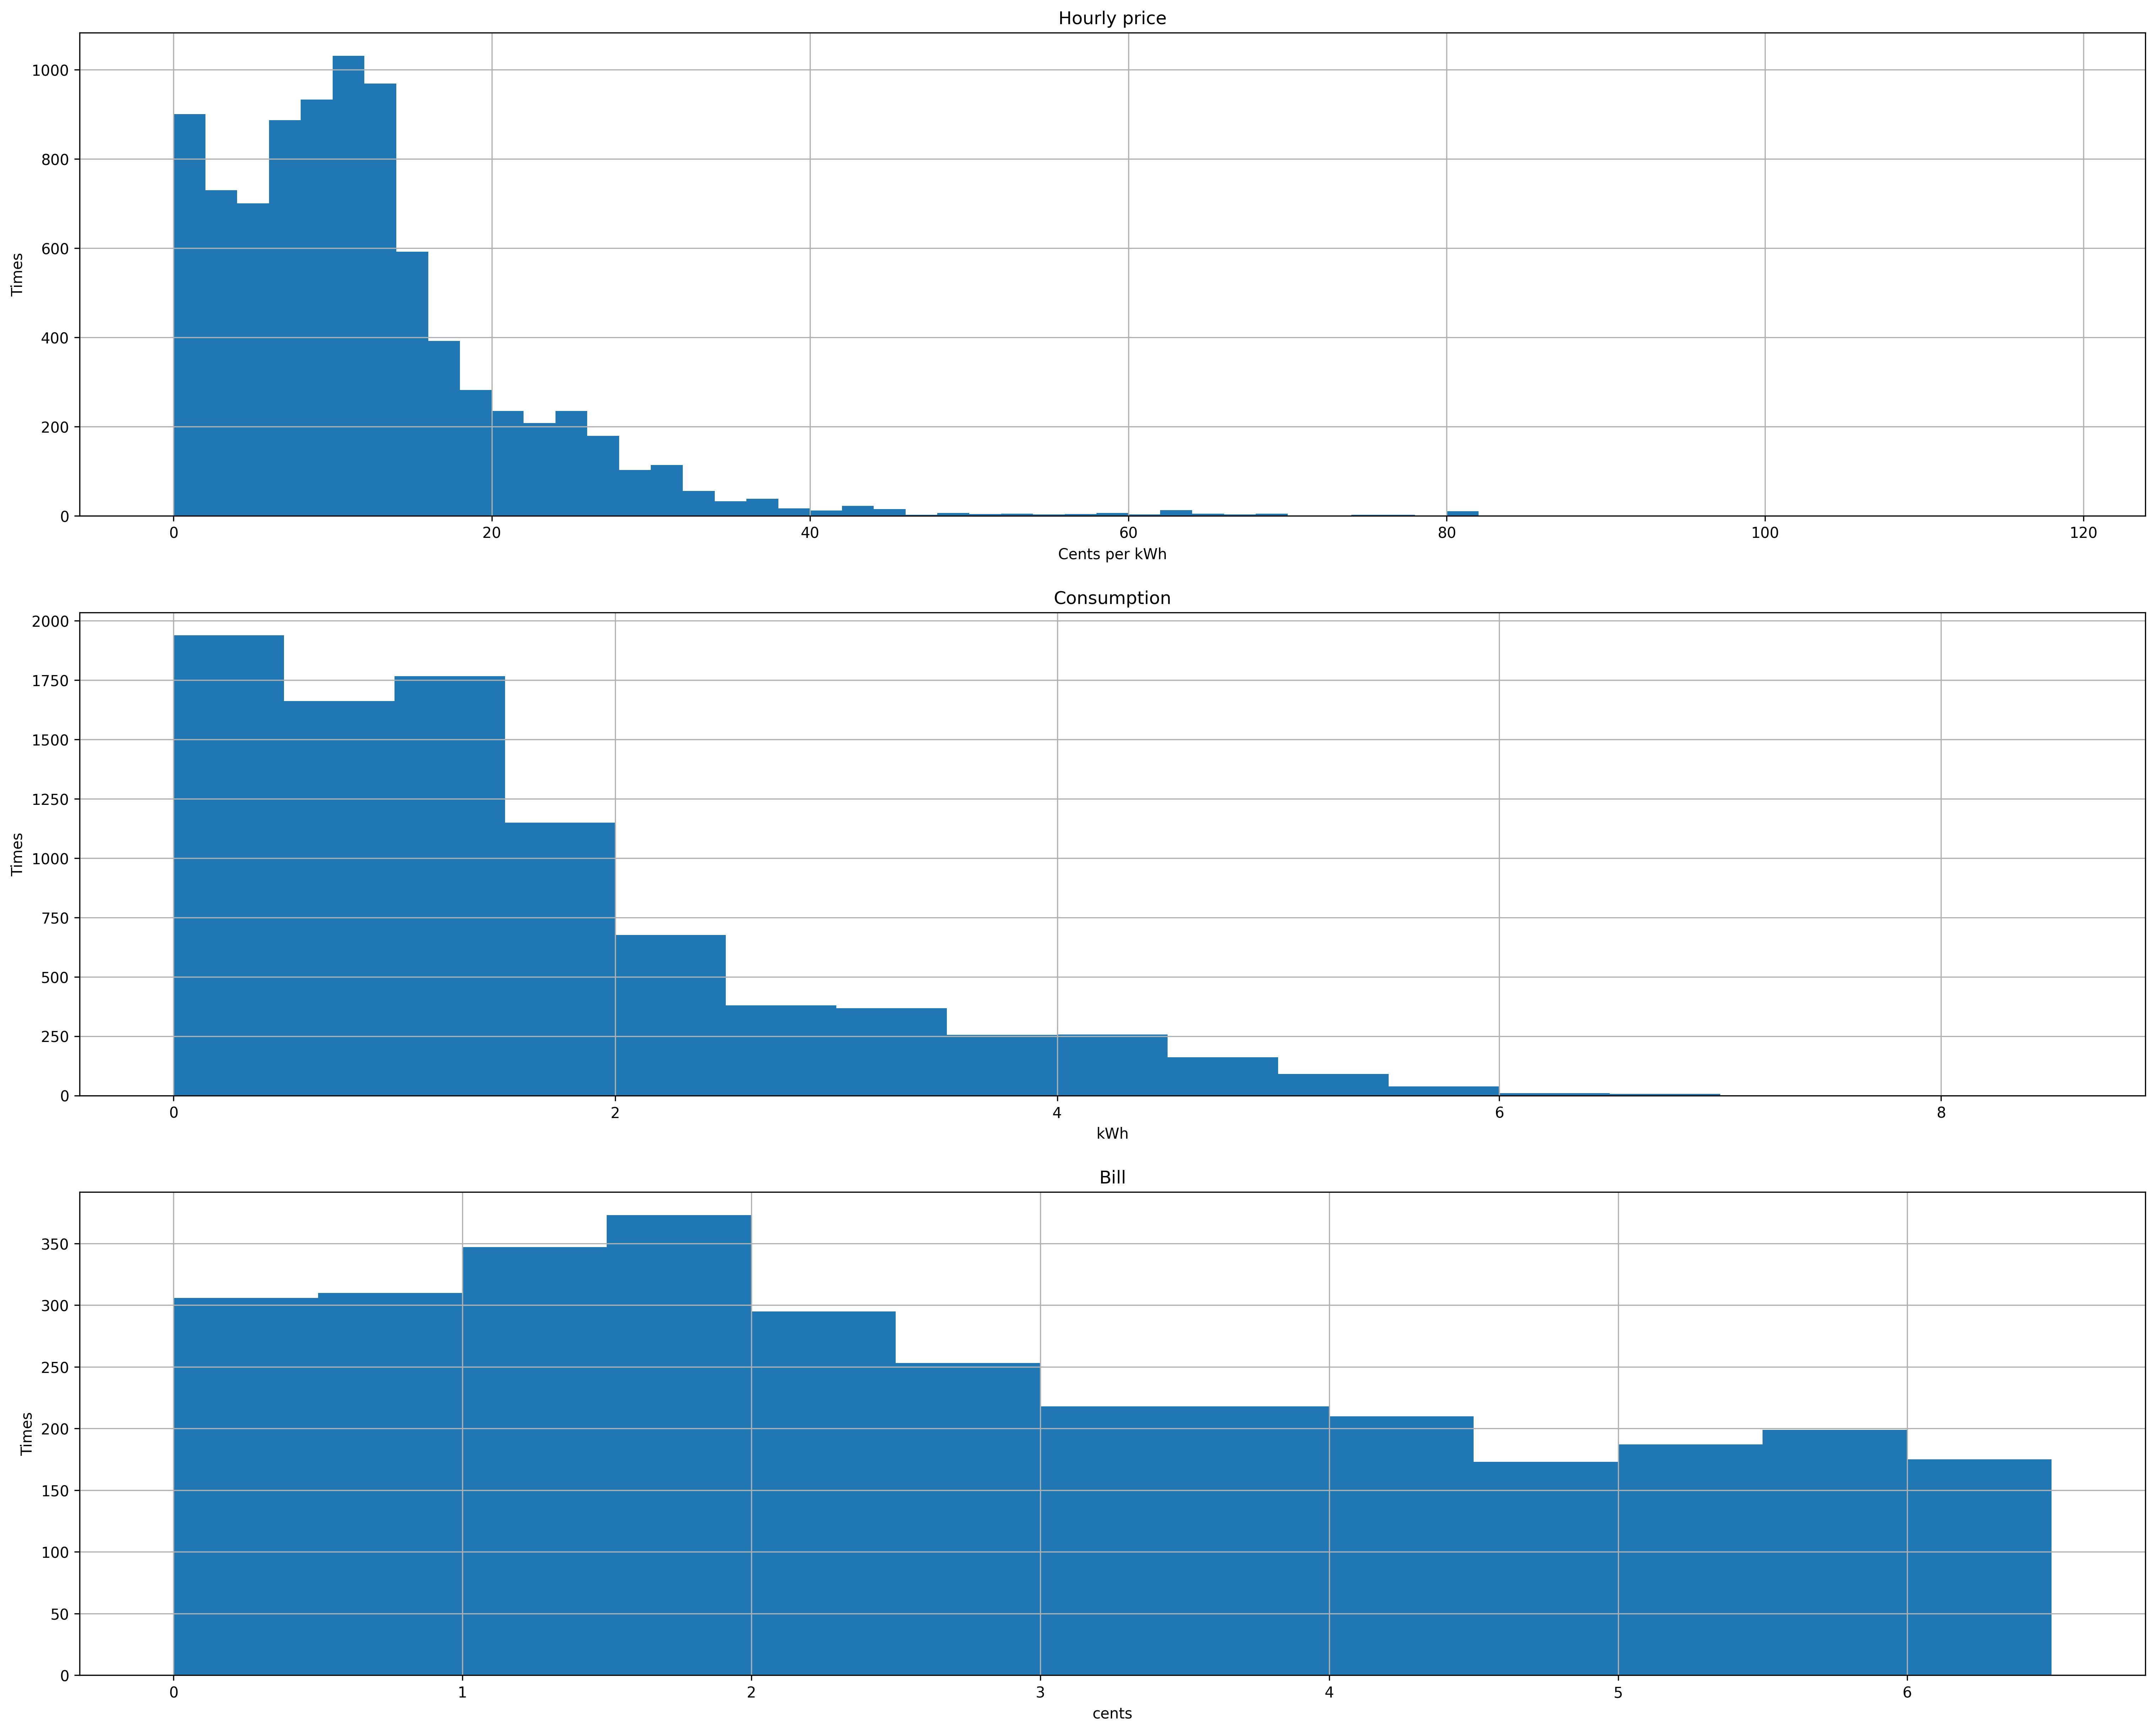

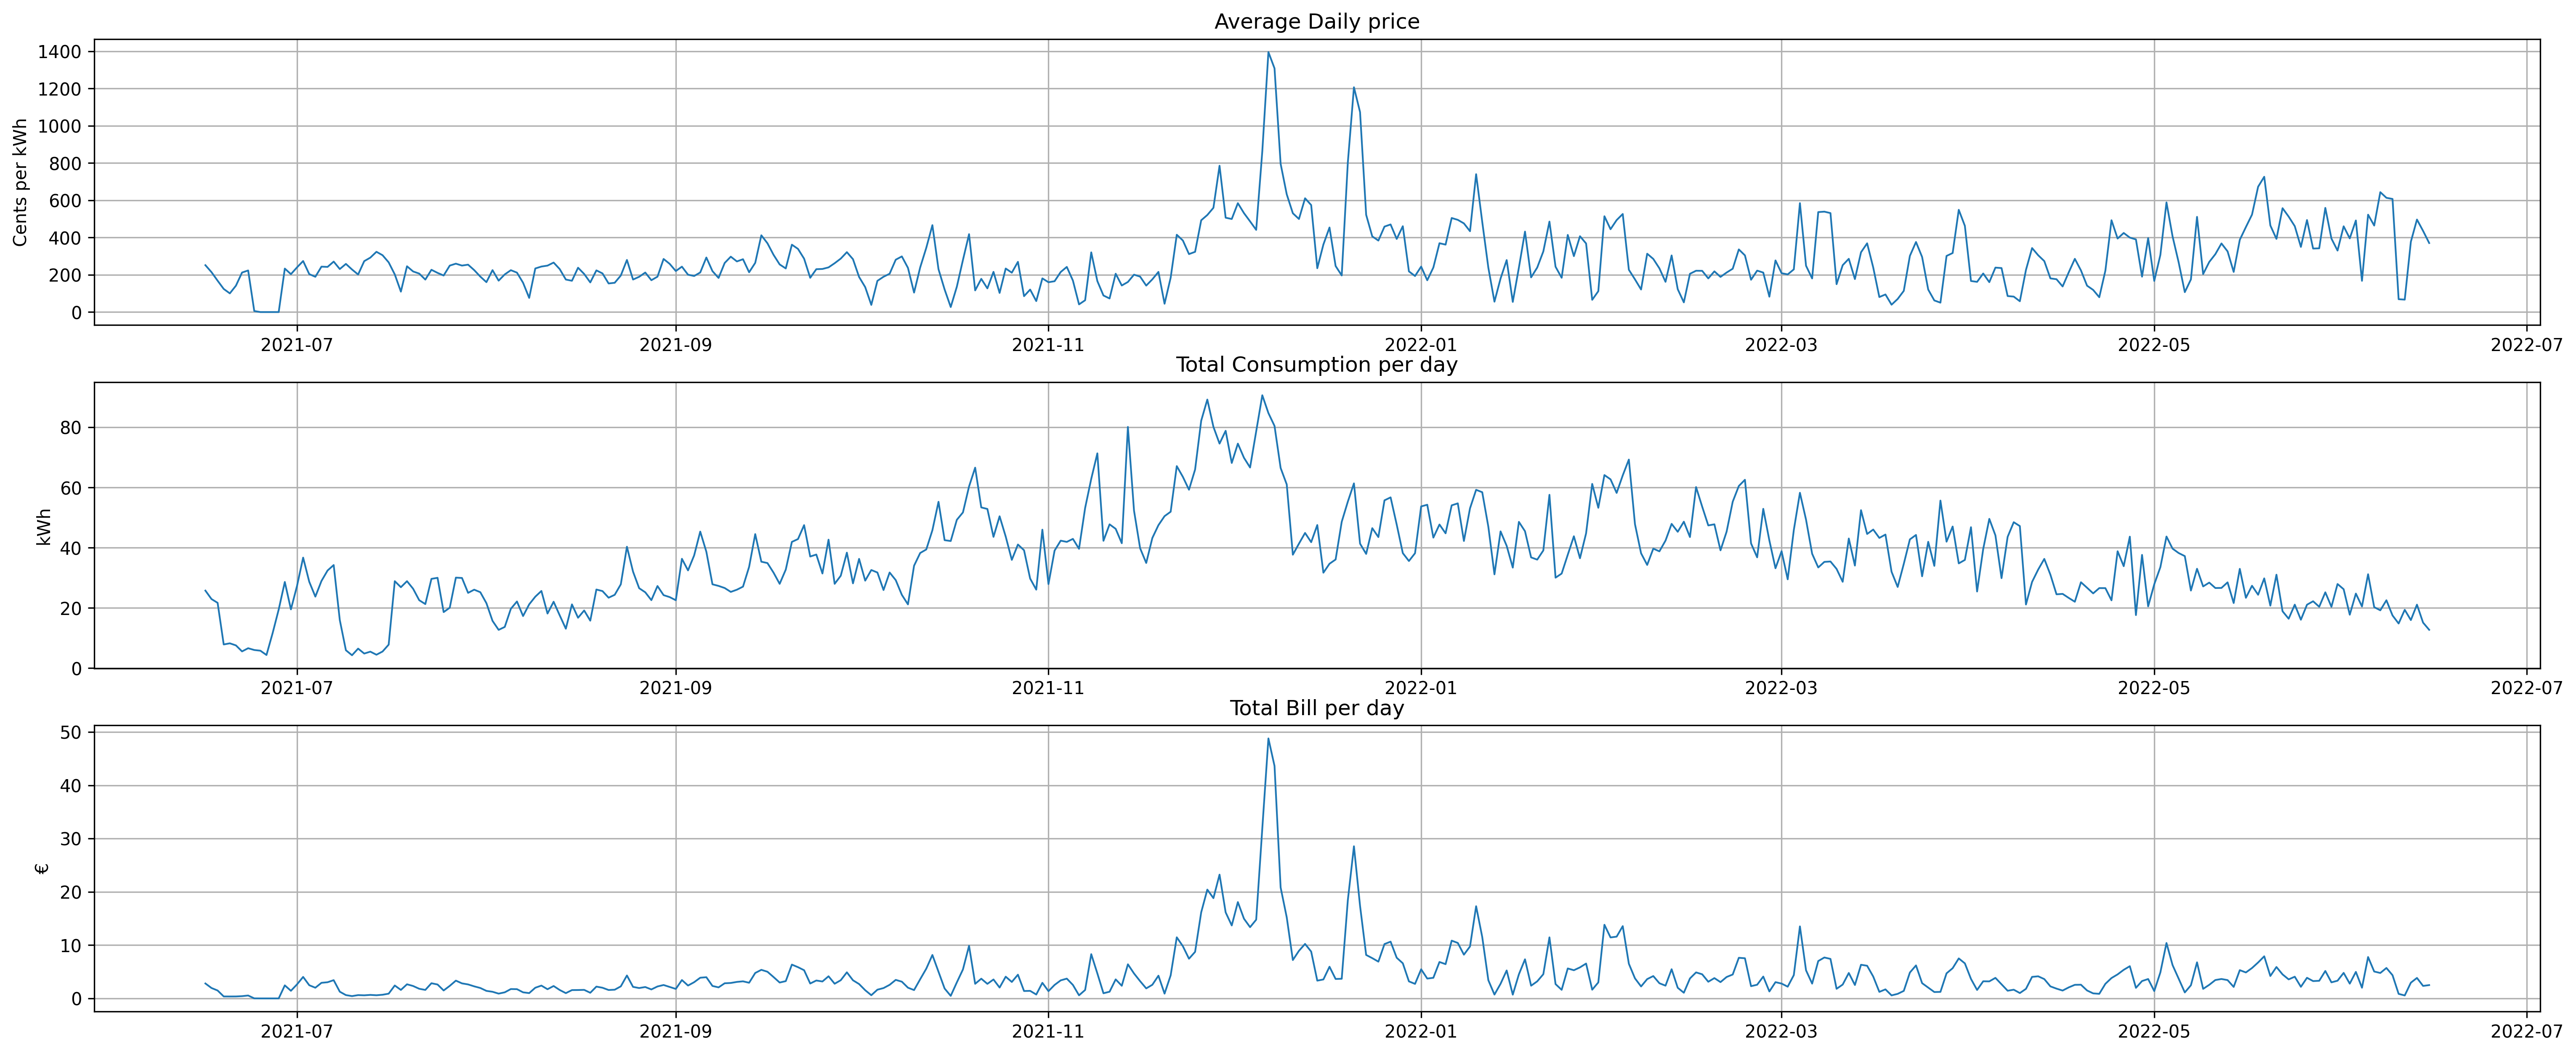

In [44]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np


#Data
data_cons = pd.read_csv("./electricity_consumption.csv", delimiter=";", decimal=',', usecols=[0, 1])
data_hprice = pd.read_csv("./hourly_prices.csv", delimiter=";", decimal=',')
data_cons["Time"] = pd.to_datetime(data_cons["Time"], format = "%d.%m.%Y %H.%M")
data_hprice["DateTime"] = pd.to_datetime(data_cons["Time"], format = "%Y-%m-%d %H:%M:%s")

data = data_cons.join(data_hprice.set_index('DateTime'), on='Time')

#Calculations
cons_sum = data['Consumption'].sum()
avg_price = round(data['price'].sum() / len(data['price']),2)
bill = round((data['price'] * data['Consumption']).sum() / 100,2)

#Prints
print("Total consumption during this period was " + str(cons_sum) + " kWh")
print("Average price per hour was " + str(avg_price) + " cents/kWh")
print("The complete amount billed was " + str(bill) + " €")

#Figure 
plt.figure(num=None, figsize=(25, 10), dpi=300, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
plt.plot(data['Time'], data['price'], linewidth = '1')
plt.title('Hourly price')
plt.ylabel('Cents per kWh')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(data['Time'], data['Consumption'], linewidth = '1')
plt.title('Consumption')
plt.ylabel('kWh')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(data['Time'], data['price'] * data['Consumption'] / 100, linewidth = '1')
plt.title('Bill')
plt.ylabel('€')
plt.grid(True)

plt.show()

#Histogram

plt.figure(num=None, figsize=(25, 20), dpi=300, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
plt.hist(data['price'],bins = np.arange(0,120,2))
plt.title('Hourly price')
plt.xlabel('Cents per kWh')
plt.ylabel('Times')
plt.grid(True)

plt.subplot(3,1,2)
plt.hist(data['Consumption'],bins = np.arange(0,9,0.5))
plt.title('Consumption')
plt.xlabel('kWh')
plt.ylabel('Times')
plt.grid(True)

plt.subplot(3,1,3)
plt.hist(data['Consumption'] * data['price'],bins = np.arange(0,7,0.5))
plt.title('Bill')
plt.xlabel('cents')
plt.ylabel('Times')
plt.grid(True)

plt.show()

#Daily Averages and Totals

data['bill'] = data['price'] * data['Consumption']
avg_data = data.groupby(by=pd.Grouper(freq='D', key='Time')).mean()
total_data = data.groupby(by=pd.Grouper(freq='D', key='Time')).sum()

#DA Figures

plt.figure(num=None, figsize=(25, 10), dpi=300, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
plt.plot(new_data['price'], linewidth = '1')
plt.title('Average Daily price')
plt.ylabel('Cents per kWh')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(total_data['Consumption'], linewidth = '1')
plt.title('Total Consumption per day')
plt.ylabel('kWh')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(total_data['bill'] / 100, linewidth = '1')
plt.title('Total Bill per day')
plt.ylabel('€')
plt.grid(True)

plt.show()